In [94]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

Inintialzie variables:
- x0 = initial position of the marbles (t=0), before collision
  - x0R = red marble initial position 
  - x0B = blue marble initial position

In [95]:
x0R = 10
x0B = -10
x0 = [x0R,x0B]

- x0 = initial velocity (t=0), before collision
  - v0R = red marble initial velocity
  - v0B = blue marble initial velocity

In [96]:
v0R = 0
v0B = 1.8

# writing them in numpy array help us with the matrix vector multiplication
v0 = np.array([v0R,v0B])

- masses
    - mR = red marble mass
    - mB = blue marble mass

In [97]:
mR = 1
mB = 3

# some useful extra variables
msum = mR + mB
mdiff = mR - mB

In [98]:
# mass matrix
# we will make use of numpy array again
# each row is initiated with a list
# the matrix is then a list of lists, each of them is a row of the matrix

mass_matrix = np.array([[mdiff/msum,2*mB/msum],[2*mR/msum,mdiff/-msum]])


In [99]:
# making sure the matrix is correct and does not have mistakes
print(mass_matrix)

[[-0.5  1.5]
 [ 0.5  0.5]]


In [100]:
# matrix vector multiplication done using numpy dot function
# the input variable are the matrix and the vector, order matters here

vT = np.dot(mass_matrix,v0)

In [101]:
# we can access the individual elements of the output like we did for lists
print('velocity of the red marble after the collision =',vT[0])
print('velocity of the blue marble after the collision =',vT[1])

velocity of the red marble after the collision = 2.7
velocity of the blue marble after the collision = 0.9


In [102]:
# when do the collide if time begins with (t=0)?
col_time = ((x0[0]-x0[1])/(v0[1]-v0[0]))
print('collision at time=',col_time,'sec')

collision at time= 11.11111111111111 sec


In [103]:
# use function to calculate postion as a function of time
def position(x00,v00,t):
    """determine postion t seconds after being at x00, while travelling with velocity v00"""
    return x00 + v00*t

In [104]:
# use this to get the position where the colision takes place
col_pos = position(x0,v0,col_time)

In [105]:
col_pos

array([10., 10.])

In [106]:
Tsteps = 100

time = np.linspace(0, 2*col_time, Tsteps)
red_pos = []
blue_pos = []

# loop iterating time values
for t in time:
    #before collision we use initial values of position and velocity
    
    if t < col_time:
        red_pos_t = position(x0R,v0R,t)
        blue_pos_t = position(x0B,v0B,t)
        # after collision we

    else:
        red_pos_t = position(col_pos[0],vT[0],t-col_time)
        blue_pos_t = position(col_pos[1],vT[1],t-col_time)
    red_pos.append(red_pos_t)
    blue_pos.append(blue_pos_t)

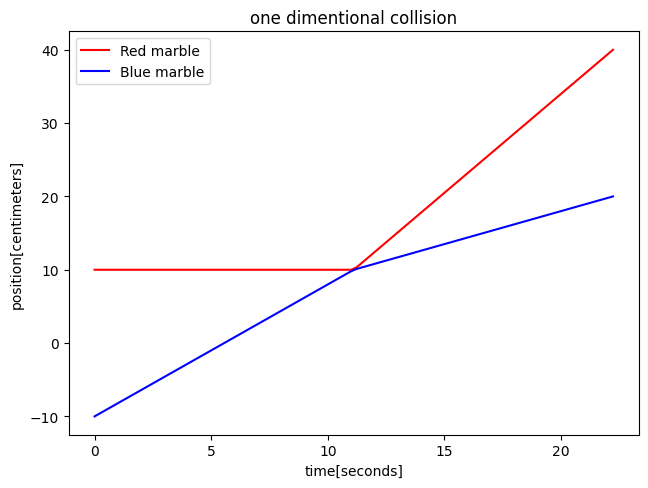

In [107]:
plt.plot(time,red_pos,'r')
plt.plot(time,blue_pos,'b')
plt.title('one dimentional collision')
plt.xlabel('time[seconds]')
plt.ylabel('position[centimeters]')
plt.legend(['Red marble','Blue marble'])

plt.tight_layout(pad = 0.4, w_pad = 6.5, h_pad = 1.0)